# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Для комплексного исследования нам необходимобудет пройти следующие этапы:**

1. Обзор данных и получение общей информации о них

2. Предобработка данных (переименование столбцов, работа с пропусками, изучение типов данных, поиск и замена дубликатов)

3. Добавление дополнительных столбцов для анализа данных, расчет необходимых показателей

4. Исследовательский анализ данных

5. Выводы по итогам проекта

**Целью исследования являются следующие направления:**

* Оценить качество данных и проверить их полноту

* Добавить необходимые расчеты / столбцы / показатели

* Провести исследовательский анализ данных по каждому показателю

* Оценить как быстро продавались квартиры

* Какие факторы влияют на стоимость объектов недвижимости

* Оценить среднюю стоимость квадратного метра в 10 населенных пунктов с наибольшим количеством объявлений

* Оценить зависимость стоимости объекта недвижимости от удаленности от центра города

### Откройте файл с данными и изучите общую информацию.

In [ ]:
# импорт библиотеки pandas
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
# чтение и загрузка файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


При первой попытке прочтения файла обнаружилось, что данные были склеены в одну строку. Поэтому применили к ним разделитель - знак табуляции, sep = '\t'

#### Описание данных

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — общая площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении



#### Изучение общей информации о данных

In [ ]:
# выведем общую информацию о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.shape

(23699, 22)

Датасет содержит всего 22 столбца и 23 699 строк, при этом уже очевидно, что в 14 столбцах данные частично отстуствуют.

#### Гистограмма для всех столбцов таблицы

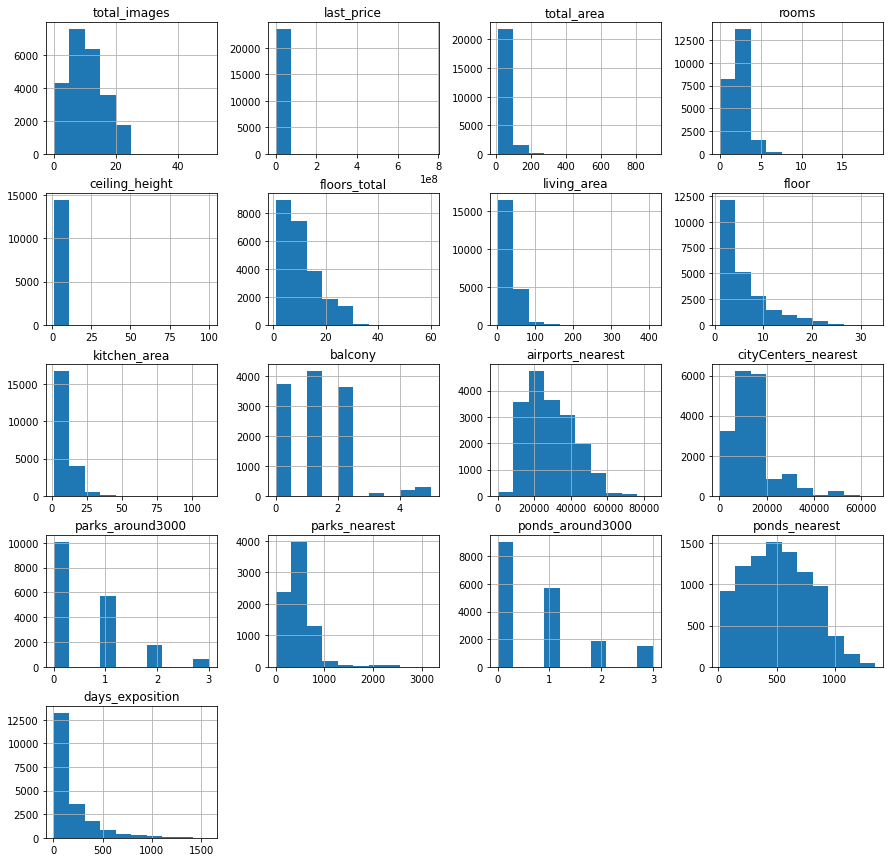

In [ ]:
data.hist(figsize=(15, 15));

По гистограммам видно, что данные неоднородные и требуют более детального изучения

### Предобработка данных

#### Переименование столбцов

In [ ]:
# переименуем столбцы в стиле Python
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})

#### Работа с пропусками

In [ ]:
# выведение количества пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как ранее отмечалось, в 14 столбцах частично отсутствуют значения. Заполним пропуски там, где это возможно (начнем с минимальных значений по возрастанию).

Причины, по которым данные отсутсвовали и как заполнять пропуски:

ceiling_height (9195) - 39% данных отсутствует. Выведем уникальные значения по этому столбцу. Произведем логичную замену и преобразуем высоту потолка в вещественное число (для потолков более 20 м значение разделим на 10 ). Остальные пропуски заполним медианным значением.

floors_total (86) - человеческий фактор, продавец не указал данные. Данные заполним по значению из столбца Floor, так как там нет пропусков (предположим, что этаж указан последний).

living_area (1903) - скорее всего обусловлено ошибкой / незнанием продавца (8% от общего массива), пропуски можем заполнить как разница между общей площадью за вычетом площади кухни, остальное оставляем как есть.

is_apartment (20924) - 88% данных отсуствует. Так как этот столбец содержит булево значение (то есть True - тип недвижимости апартаменты, False - нет), то пропуски можем заполнить значением False.

kitchen_area (2278) - скорее всего обусловлено ошибкой / незнанием продавца, 10% от общего массива заполнить нечем, оставляем как есть

balcony (11519) - пропуски в данных скорее всего обусловлены реальным отстутствием балкона и поэтому продавец оставлял эту ячейку пустой. Заменим пропуски на 0.

locality_name (49) - человеческий фактор, продавец не указал данные, пропуски заполнять не стали, так как их количество очень мало по сравнению со всем датасетом.

airports_nearest (5542) - это картографические данные (23% от общего массива), их отстутствие обусловлено скорее всего ошибкой в расчетах по карте / либо слишком далеко расположены аэропорты, оставим как есть.

city_centers_nearest (5519) - это картографические данные, их отстутствие обусловлено скорее всего ошибкой в расчетах по карте, оставим как есть.

parks_around_3000 (5518) - это картографические данные, их отстутствие обусловлено скорее всего ошибкой в расчетах по карте / либо они расположены далее 3 км, заменим на 0.

parks_nearest (15620) - это картографические данные (66% от общего массива), их отстутствие обусловлено скорее всего ошибкой в расчетах по карте / либо слишком далеко расположены парки, оставим как есть.

ponds_around_3000 (5518) - это картографические данные, их отстутствие обусловлено скорее всего ошибкой в расчетах по карте / либо они расположены далее 3 км, заменим на 0.

ponds_nearest (14589) - это картографические данные (62% от общего массива), их отстутствие обусловлено скорее всего ошибкой в расчетах по карте / либо слишком далеко расположены водоемы, оставим как есть.

days_exposition (3181) - 13% от общего массива, достаточно большая доля остуствия, скорее всего вызвано технической ошибкой, так как этот показатель должен считаться автоматически (от публикации до снятия). Так как даты снятия объявления нет, то показатель посчитать не сможем, оставляем как есть.

In [ ]:
# посмотрим 5 строк отстуствующих данных по столбцу floors_total
display(data[data['floors_total'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [ ]:
# эти пропуски можем заполнить по данным из столбца floor, так как там нет отстувтующих значений
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()

0

In [ ]:
# эти пропуски можем заполнить как разность total_area и kitchen_area
data['living_area'] = data['living_area'].fillna((data['total_area'] - data['kitchen_area']))
data['living_area'].isna().sum()

1464

Данные по living_area заполнились частично, остальные пропуски оставим как есть.

In [ ]:
# посмотрим какие значения по этому показателю есть
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [ ]:
# скорее всего парки расположены далее 3 км от объекта недвижимости, заменим пропуски на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'].isna().sum()

0

In [ ]:
# посмотрим какие значения по этому показателю есть
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [ ]:
# скорее всего водоемы расположены далее 3 км от объекта недвижимости, заменим пропуски на 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'].isna().sum()

0

In [ ]:
# посмотрим какие значения по этому показателю есть
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [ ]:
# для потолков более 20 м произведем логическую замену и разделим значение на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
# заменим пропуски на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

В данном столбце остались явные аномалии по высоте потолка, их мы разберем в блоке Исследовательский анализ данных

In [ ]:
# посмотрим какие значения по этому показателю есть
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [ ]:
# заменим пропуски на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [ ]:
# посмотрим какие значения по этому показателю есть
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [ ]:
# заменим пропуски на False
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

#### Изучение типов данных

In [ ]:
# выведем общую информацию о данных еще раз

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           22235 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


В некоторых столбцах необходимо изменить тип данных для корректного исследования в дальнейшем:

 1   last_price float64 на int64

 3   first_day_exposition  object на datetime

 6   floors_total float64 на int64

 9   is_apartment object на bool

 13  balcony float64 на int64

 17  parks_around_3000 float64 на int64

 19  ponds_around_3000 float64 на int64

 Визуально в таблице мы видим, что данные можно было было заменить с float64 на int64 (например, в столбце "days_exposition"), но из-за пропусков это невозможно, поэтому оставляем как есть.


In [ ]:
# произведем замену типов данных по указанным выше столбцам
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['is_apartment'] = data['is_apartment'].astype('boolean')
data['balcony'] = data['balcony'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Поиск дубликатов

In [ ]:
    data.duplicated().sum()
    # явные дубликаты отсутствуют

0

In [ ]:
# поиск неявных дубликатов в названиях населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
# заменим поселок на посёлок и еще раз посмотрим на значения
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [ ]:
# заменим одиночные названия на полноценные
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})


Ранее мы считали кол-во пропусков в этом столбце, их было 49. Так как кол-во строк с пустым наименованием очень мало, то можем на этом этапе их удалить из датасета. Итого у нас останется 23 650 строк

In [ ]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
# добавим столбец - цена за 1 кв м
data['price_metr'] = round(data['last_price'] / data['total_area'],0)

In [ ]:
# добавим столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['exposition_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [ ]:
# добавим столбец - месяц публикации объявления
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [ ]:
# добавим столбец - год публикации объявления
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [ ]:
# добавим столбец - тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

In [ ]:
# добавим столбец - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_center_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [ ]:
# проверим добавленные столбцы
display(data.head(13))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metr,exposition_day,exposition_month,exposition_year,floor_category,city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95066.0,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99196.0,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,52.70,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110545.0,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87455.0,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88525.0,6,2,2017,другой,15.0


В итоге добавилось 6 столбцов, при этом в столбце "расстояние до центра города в километрах" присутствуют пропуски, так как в исходных данных они были.  

### Проведите исследовательский анализ данных

#### Изучение параметров объекта недвижимости

**Общая площадь** `total_area`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['total_area'].describe())

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

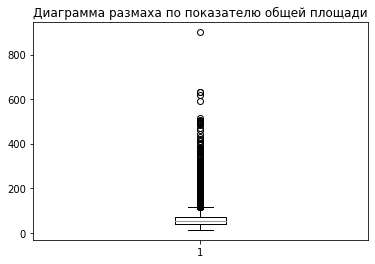

In [ ]:
# построим диаграмму размаха
import matplotlib.pyplot as plt
plt.boxplot(data['total_area'])
plt.title('Диаграмма размаха по показателю общей площади')
plt.show()

Судя по этим данным , мы можем сразу понять, что: средняя площадь объекта 60м2, минимальная - 12м2 (это значение, скорее всего ошибочно, так как метраж для студии слишком мал), максимальная - 900 м2 (это значение либо тоже ошибочно, либо огромный коттедж и в таком случае этот объект будет выбросом, который придется удалить из выборки).

Чтобы далее понять, надо ли удалять объекты с слишком малым и слишком большим метражом, посчитаем их количество.

In [ ]:
# возьмем диапазон: минимальный размер студии до 20м и макисмальный размер обычной городской квартиры 200м
display(data.query('total_area <20  or total_area > 200').count())

total_images            254
last_price              254
total_area              254
first_day_exposition    254
rooms                   254
ceiling_height          254
floors_total            254
living_area             226
floor                   254
is_apartment            254
studio                  254
open_plan               254
kitchen_area            202
balcony                 254
locality_name           254
airports_nearest        241
city_centers_nearest    244
parks_around_3000       254
parks_nearest           158
ponds_around_3000       254
ponds_nearest           174
days_exposition         202
price_metr              254
exposition_day          254
exposition_month        254
exposition_year         254
floor_category          254
city_center_km          244
dtype: int64

Таких объектов 254 штуки (1%), поэтому для дальнейшего анализа этими данными можно пренебречь.

In [ ]:
# перезапишем наш датасет без учета этих объектов
data = data.query('total_area >= 20  and total_area <= 200 or total_area=="NaN"')
data.shape

(23396, 28)

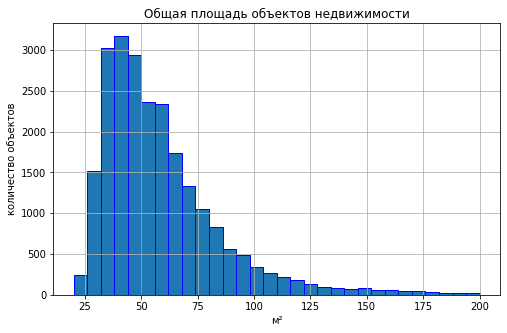

In [ ]:
# построим гистограмму

data['total_area'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('количество объектов')
plt.show()

На гистограмме мы видим, что основная часть объектов недвижимости приходится на общую площадь от 30 до 70 метров. Объекты площадью свыше 120 м редки. Медианное значение 52м и среднее значение 60м имеют небольшую дельту между собой, что говорит о хорошем качестве данных по этому показателю.

**Жилая площадь** `living_area`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['living_area'].describe())

count    21964.000000
mean        33.617190
std         17.765299
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        186.120000
Name: living_area, dtype: float64

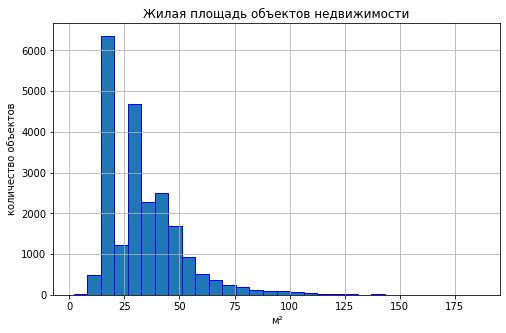

In [ ]:
# построим гистограмму

data['living_area'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('количество объектов')
plt.show()

По показателям мы можем отметить, что основная часть объектов с жилой площадью в диапазоне 20-25м и 30-50м. Среднее значение 33 м и медианное 30м. Минимальное значение в 2м скорее всего ошибка, так как таких размеров в реальности быть не может.

Посчитаем, сколько таких объектов с жилой площадью менее 10м.

In [ ]:
display(data.query('living_area <10').count())

total_images            24
last_price              24
total_area              24
first_day_exposition    24
rooms                   24
ceiling_height          24
floors_total            24
living_area             24
floor                   24
is_apartment            24
studio                  24
open_plan               24
kitchen_area            22
balcony                 24
locality_name           24
airports_nearest        23
city_centers_nearest    23
parks_around_3000       24
parks_nearest           12
ponds_around_3000       24
ponds_nearest           11
days_exposition         21
price_metr              24
exposition_day          24
exposition_month        24
exposition_year         24
floor_category          24
city_center_km          23
dtype: int64

Таких объектов оказалось 24 штуки, можем их убрать из нашей общей выборки.

In [ ]:
# убираем объекты с жилой площадью менее 10м
data = data.query('living_area >= 10 or living_area.isna()==True')
data.shape

(23372, 28)

**Площадь кухни** `kitchen_area`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['kitchen_area'].describe())

count    21157.000000
mean        10.376287
std          5.356205
min          1.300000
25%          7.000000
50%          9.000000
75%         11.980000
max         93.200000
Name: kitchen_area, dtype: float64

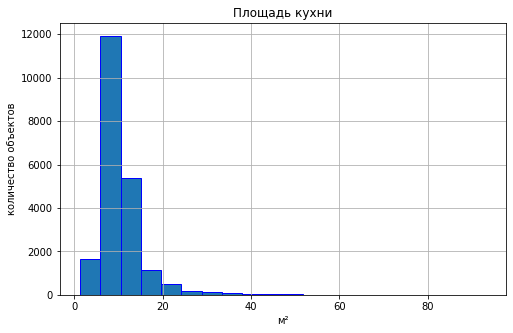

In [ ]:
# построим гистограмму

data['kitchen_area'].hist(bins = 20, figsize=(8,5), ec='blue')
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('количество объектов')
plt.show()

По показателям мы можем отметить, что основная часть объектов с площадью кухни в диапазоне 10-15м. Среднее значение 10м и медианное 9м. Минимальное значение в 1м скорее всего ошибка, так как таких размеров в реальности быть не может.

Посчитаем, сколько таких объектов с площадью кухни менее 5м.

In [ ]:
display(data.query('kitchen_area < 5').count())

total_images            101
last_price              101
total_area              101
first_day_exposition    101
rooms                   101
ceiling_height          101
floors_total            101
living_area             101
floor                   101
is_apartment            101
studio                  101
open_plan               101
kitchen_area            101
balcony                 101
locality_name           101
airports_nearest         66
city_centers_nearest     66
parks_around_3000       101
parks_nearest            20
ponds_around_3000       101
ponds_nearest            37
days_exposition          87
price_metr              101
exposition_day          101
exposition_month        101
exposition_year         101
floor_category          101
city_center_km           66
dtype: int64

Таких объектов оказалось 101 штука, можем их убрать из нашей общей выборки.

In [ ]:
# убираем объекты с площадью кухни менее 5м
data = data.query('kitchen_area >= 5 or kitchen_area.isna()==True')
data.shape

(23271, 28)

**Цена объекта** `last_price`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['last_price'].describe())

count    2.327100e+04
mean     6.039985e+06
std      6.243542e+06
min      1.219000e+04
25%      3.405500e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Данные имеют нечитабельный вид, поэтому добавим дополнительный столбец "last_price_10" - это будет цена в пересчете на 1 млн

In [ ]:
data['last_price_10'] = data['last_price'] / 1000000

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['last_price_10'].describe())

count    23271.000000
mean         6.039985
std          6.243542
min          0.012190
25%          3.405500
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price_10, dtype: float64

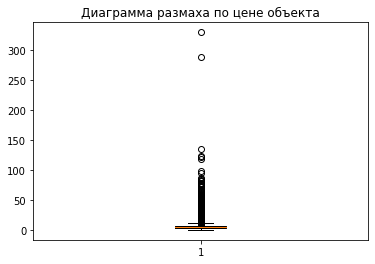

In [ ]:
# построим диаграмму размаха

plt.boxplot(data['last_price_10'])
plt.title('Диаграмма размаха по цене объекта')
plt.show()

На данной диаграмме мы видим, что имеются выбросы по цене от 150 млн. Посчитаем количество таких объектов и при необходимости уберем их из выборки, так как они не репрезентативны для наших целей.

In [ ]:
display(data.query('last_price_10 > 150').count())

total_images            2
last_price              2
total_area              2
first_day_exposition    2
rooms                   2
ceiling_height          2
floors_total            2
living_area             2
floor                   2
is_apartment            2
studio                  2
open_plan               2
kitchen_area            2
balcony                 2
locality_name           2
airports_nearest        2
city_centers_nearest    2
parks_around_3000       2
parks_nearest           2
ponds_around_3000       2
ponds_nearest           2
days_exposition         1
price_metr              2
exposition_day          2
exposition_month        2
exposition_year         2
floor_category          2
city_center_km          2
last_price_10           2
dtype: int64

Таких объекта только 2 штуки, уберем их.

In [ ]:
# убираем объекты стоимостью более 150 млн.
data = data.query('last_price_10 <= 150 or last_price_10.isna()==True')
data.shape

(23269, 29)

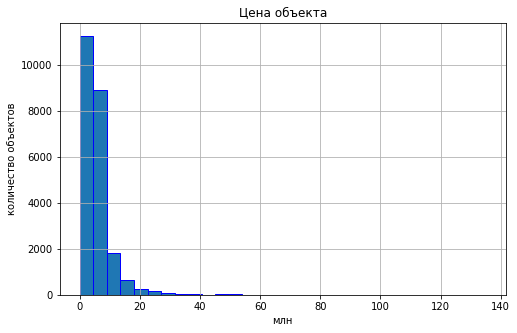

In [ ]:
# построим гистограмму

data['last_price_10'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Цена объекта')
plt.xlabel('млн')
plt.ylabel('количество объектов')
plt.show()

In [ ]:
display(data['last_price_10'].describe())

count    23269.000000
mean         6.013892
std          5.570202
min          0.012190
25%          3.405000
50%          4.600000
75%          6.700000
max        135.000000
Name: last_price_10, dtype: float64

Основное количество объектов недвижимости имеет стоимость от 5 до 10 млн. При этом среднее значение 6 млн, а медианное 4.6 млн. Стоимость от 10 до 20 млн также имеет место быть, а цены выше 20 млн. совсем единичны.

**Количество комнат** `rooms`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['rooms'].describe())

count    23269.000000
mean         2.037690
std          0.995908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

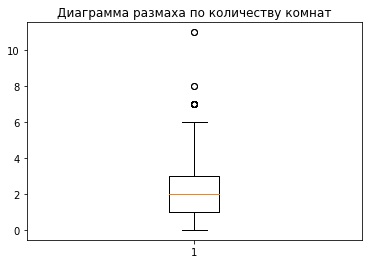

In [ ]:
# построим диаграмму размаха

plt.boxplot(data['rooms'])
plt.title('Диаграмма размаха по количеству комнат')
plt.show()

Глядя на диаграмму размаха, очевидно, что выборка содержит объекты недвижимости, в которых количество комнат более 6 - это выбросы значений, которые лучше исключить. Проверим количество такиъ объектов, где комнат больше 6 штук.

In [ ]:
display(data.query('rooms > 6').count())

total_images            24
last_price              24
total_area              24
first_day_exposition    24
rooms                   24
ceiling_height          24
floors_total            24
living_area             23
floor                   24
is_apartment            24
studio                  24
open_plan               24
kitchen_area            23
balcony                 24
locality_name           24
airports_nearest        24
city_centers_nearest    24
parks_around_3000       24
parks_nearest           19
ponds_around_3000       24
ponds_nearest           16
days_exposition         13
price_metr              24
exposition_day          24
exposition_month        24
exposition_year         24
floor_category          24
city_center_km          24
last_price_10           24
dtype: int64

Таких квартир 24 штуки, уберем их из нашего массива данных.

In [ ]:
# убираем объекты, где более 6 комнат.
data = data.query('rooms <= 6 or rooms.isna()==True')
data.shape

(23245, 29)

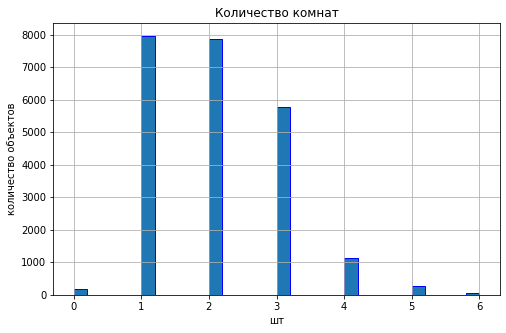

In [ ]:
# построим гистограмму

data['rooms'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Количество комнат')
plt.xlabel('шт')
plt.ylabel('количество объектов')
plt.show()

В основном продаются квартиры 1-2 комнатные и чуть меньше объявлений по 3 комнатным. В нашем массиве данных квартиры более 4 комнат редки. Среднее и медианное значение - это 2 комнатные объекты. Также в данных отражается небольшое количество с 0 комнатами, скорее всего это студии.

**Высота потолков** `ceiling_height`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['ceiling_height'].describe())

count    23245.000000
mean         2.694082
std          0.243983
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

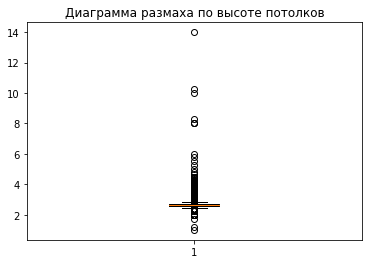

In [ ]:
# построим диаграмму размаха

plt.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха по высоте потолков')
plt.show()

На диаграмме видим, что по объектам с высотой потолков от 4,5 м данные указаны некорректно самими продавцами. Явно, что такие значения являются выбросами и ими стоит пренебречь для дальнейшего анализа. Посчитаем сколько таких объектов (высота потолка > 4м.

In [ ]:
display(data.query('ceiling_height > 4').count())

total_images            41
last_price              41
total_area              41
first_day_exposition    41
rooms                   41
ceiling_height          41
floors_total            41
living_area             37
floor                   41
is_apartment            41
studio                  41
open_plan               41
kitchen_area            34
balcony                 41
locality_name           41
airports_nearest        36
city_centers_nearest    36
parks_around_3000       41
parks_nearest           23
ponds_around_3000       41
ponds_nearest           24
days_exposition         34
price_metr              41
exposition_day          41
exposition_month        41
exposition_year         41
floor_category          41
city_center_km          36
last_price_10           41
dtype: int64

Количество таких объектов не велико - 41 штука, поэтому удаление их сильно не исказит дальнейший анализ.

In [ ]:
# убираем объекты с высотой потолков более 4м
data = data.query('ceiling_height <= 4 or ceiling_height.isna()==True')
data.shape

(23204, 29)

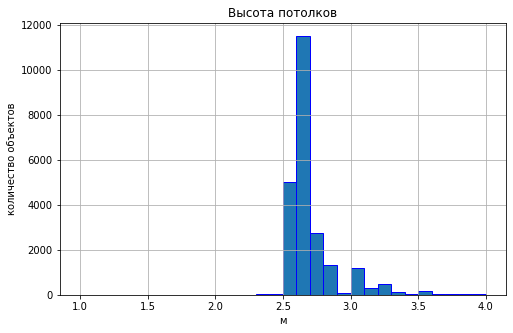

In [ ]:
# построим гистограмму

data['ceiling_height'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Высота потолков')
plt.xlabel('м')
plt.ylabel('количество объектов')
plt.show()

Итак, мы убедились , судя по гистограмме, что основная часть объектов имеют стандартную высоту потолка от 2,5 до 2,7 м. Реже представлены объекты с высотой потолка 2,8-2,9. И совсем единичны случаи, где потолки выше 3м. Минимальное значение потолка в данных указано = 1м, но это явная ошибка (так как этих значений очень мало, мы их оставим, они не влияют).

**Этаж квартиры** `floor`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['floor'].describe())

count    23204.000000
mean         5.914411
std          4.894024
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

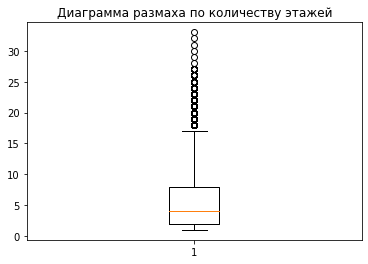

In [ ]:
# построим диаграмму размаха

plt.boxplot(data['floor'])
plt.title('Диаграмма размаха по количеству этажей')
plt.show()

По диаграмме видим, что дома с количеством этажей свыше 17 явно "выбиваются" из общей выборке и не соответствуют стандартному градостроению. Поэтому посчитаем количество таких объектов, чтобы убедиться , что их удаление не повлияет на общий объем.

In [ ]:
display(data.query('floor > 17').count())

total_images            909
last_price              909
total_area              909
first_day_exposition    909
rooms                   909
ceiling_height          909
floors_total            909
living_area             849
floor                   909
is_apartment            909
studio                  909
open_plan               909
kitchen_area            794
balcony                 909
locality_name           909
airports_nearest        748
city_centers_nearest    749
parks_around_3000       909
parks_nearest           169
ponds_around_3000       909
ponds_nearest           317
days_exposition         824
price_metr              909
exposition_day          909
exposition_month        909
exposition_year         909
floor_category          909
city_center_km          749
last_price_10           909
dtype: int64

Количество таких объектов 909 штук(4%). Ранее мы удалили из выборки еще порядка 2%.
То есть если мы сейчас удалим такие многоэтажки, то относительно первоначальных данных массив будет очищен всего на 6%.
Уберем эти объекты и посмотрим на гистограмму.

In [ ]:
# убираем объекты с расположением выше 17 этажа
data = data.query('floor <= 17 or floor.isna()==True')
data.shape

(22295, 29)

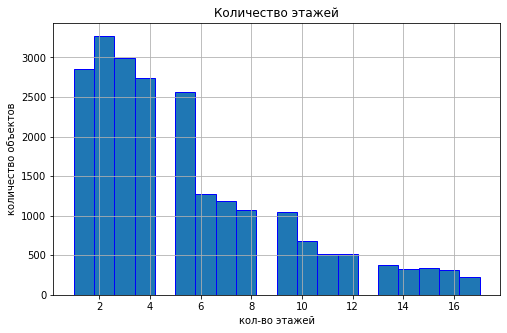

In [ ]:
# построим гистограмму

data['floor'].hist(bins = 20, figsize=(8,5), ec='blue')
plt.title('Количество этажей')
plt.xlabel('кол-во этажей')
plt.ylabel('количество объектов')
plt.show()

На гистограмме видим, что наш массив четко представлен 4мя группами объектов недвижимости:

1. От 1 до 4 этажей большая часть

2. от 5 до 8 этажей

3. от 9 до 12 этажей

4. от 13 до 16 этажей

Когда так четко распределены группы, убеждаемся еще раз, что удаление выбросов от 17 этажей было правильным решением.

**Тип этажа квартиры («первый», «последний», «другой»)** `floor_category`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['floor_category'].value_counts())

другой       16342
последний     3100
первый        2853
Name: floor_category, dtype: int64

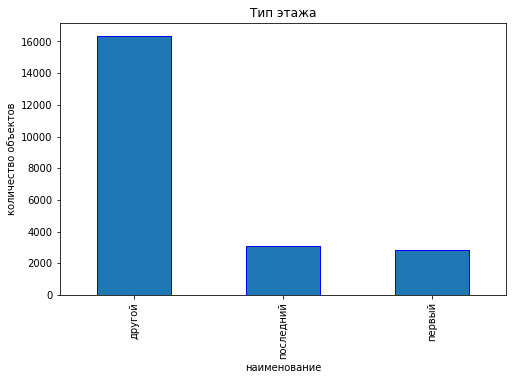

In [ ]:
# построим гистограмму

data['floor_category'].value_counts().plot(kind = 'bar', figsize=(8,5), ec='blue')
plt.title('Тип этажа')
plt.xlabel('наименование')
plt.ylabel('количество объектов')
plt.show()

73% квартир продаются не на первом и не на последнем этажах. Первый и последний этажи имеют практически одинаковое количество квартир 13% и 14% соответственно

**Общее количество этажей в доме** `floors_total`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['floors_total'].describe())

count    22295.000000
mean        10.205472
std          6.134149
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

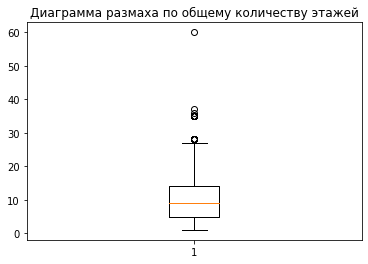

In [ ]:
# построим диаграмму размаха

plt.boxplot(data['floors_total'])
plt.title('Диаграмма размаха по общему количеству этажей')
plt.show()

Данный показатель аналогичен ранее рассмотренному про этажи. По диаграмме видим, что дома с количеством этажей свыше 25 явно "выбиваются" из общей выборке и не соответствуют стандартному градостроению. Поэтому посчитаем количество таких объектов, чтобы убедиться , что их удаление не повлияет на общий объем.

In [ ]:
display(data.query('floors_total > 25').count())

total_images            189
last_price              189
total_area              189
first_day_exposition    189
rooms                   189
ceiling_height          189
floors_total            189
living_area             184
floor                   189
is_apartment            189
studio                  189
open_plan               189
kitchen_area            174
balcony                 189
locality_name           189
airports_nearest        144
city_centers_nearest    144
parks_around_3000       189
parks_nearest            14
ponds_around_3000       189
ponds_nearest            53
days_exposition         163
price_metr              189
exposition_day          189
exposition_month        189
exposition_year         189
floor_category          189
city_center_km          144
last_price_10           189
dtype: int64

Количество таких объектов 189 штук(0,8%). Ранее мы удалили из выборки квартиры, которые продавались выше 17 этажа.
В данном случае также уберем эти объекты выше общего количества этажей в 25 и посмотрим на гистограмму.

In [ ]:
# убираем объекты этажностью выше 25
data = data.query('floors_total <= 25 or floors_total.isna()==True')
data.shape

(22106, 29)

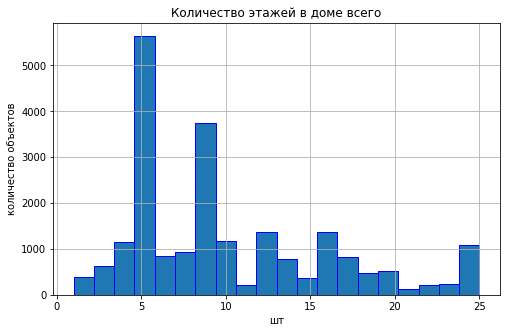

In [ ]:
# построим гистограмму

data['floors_total'].hist(bins = 20, figsize=(8,5), ec='blue')
plt.title('Количество этажей в доме всего')
plt.xlabel('шт')
plt.ylabel('количество объектов')
plt.show()

Самые продаваемые квартиры в домах этажностью 5 и 10 этажей. Средяя этажность 10, медаиана 9 этажей, минимально 1 этажные здания. Изначально (до удаления) максимальное значение было в 60 этажей и это явно были некорректные данные.

**Расстояние до центра города в метрах** `city_centers_nearest`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['city_centers_nearest'].describe())

count    16851.000000
mean     14240.731529
std       8722.003209
min        181.000000
25%       9234.000000
50%      13028.000000
75%      16195.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Напомним, что ранее по этому показателю мы наблюдали большое количество пропусков (около 25% от общего массива), это достаточно большой объем и данные мы не заполняли.
По этому показателю дополнительно "очищать" данные мы не будем.

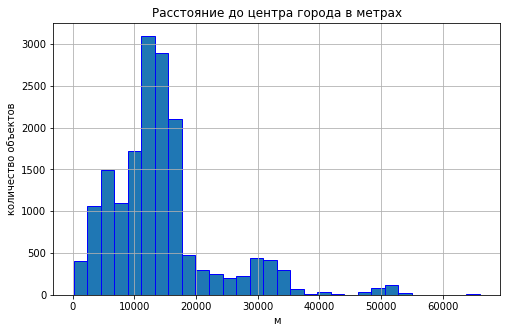

In [ ]:
# построим гистограмму

data['city_centers_nearest'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('количество объектов')
plt.show()

Объекты в основном расположены от 12 до 15 км от центра города. Максимальное расположение 65 км. Так как часть данных отстутсвует , полноценно сказать об оценке расстояний для такой недвижимости сложно.

**Расстояние до ближайшего аэропорта** `airports_nearest`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['airports_nearest'].describe())

count    16832.000000
mean     28654.893655
std      12496.513486
min          0.000000
25%      18488.000000
50%      26721.500000
75%      36969.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Напомним, что ранее по этому показателю мы наблюдали большое количество пропусков (около 25% от общего массива), это достаточно большой объем и данные мы не заполняли.
По этому показателю дополнительно "очищать" данные мы не будем.

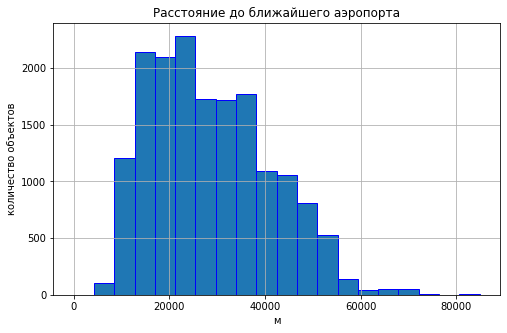

In [ ]:
# построим гистограмму

data['airports_nearest'].hist(bins = 20, figsize=(8,5), ec='blue')
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('количество объектов')
plt.show()

Объекты в основном расположены от 10 до 25 км от продаваемого объекта. Максимальное расположение 85 км. Так как часть данных отстутсвует , полноценно сказать об оценке расстояний для такой недвижимости сложно.

**Расстояние до ближайшего парка** `parks_nearest`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['parks_nearest'].describe())

count    7647.000000
mean      489.520727
std       343.688005
min         1.000000
25%       287.000000
50%       452.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Напомним, что ранее по этому показателю мы наблюдали большое количество пропусков (66% от общего массива), это достаточно большой объем и данные мы не заполняли.
По этому показателю дополнительно "очищать" данные мы не будем.

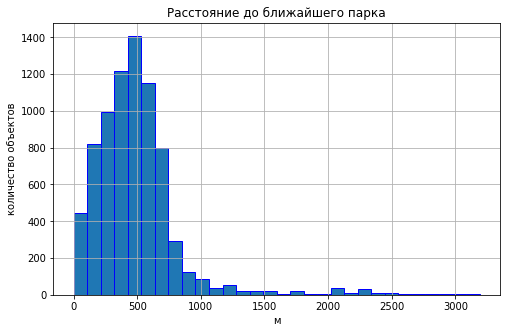

In [ ]:
# построим гистограмму

data['parks_nearest'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('количество объектов')
plt.show()

Объекты в основном расположены от 300 до 800 м от продаваемого объекта. Максимальное расположение 3 км. Если делать выводы на основе имеющихся данных, то такое расположение достаточно комфортное для проживания и для выбора недвижимости - наличие парка хороший критерий.

**День и месяц публикации объявления** `exposition_day` `exposition_month`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['exposition_day'].describe())

count    22106.000000
mean         2.564417
std          1.789951
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_day, dtype: float64

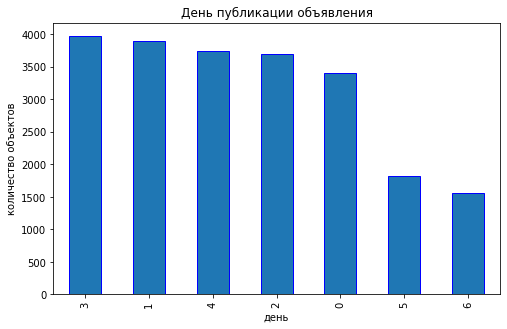

In [ ]:
# построим гистограмму

data['exposition_day'].value_counts().plot(kind = 'bar', figsize=(8,5), ec='blue')

plt.title('День публикации объявления')
plt.xlabel('день')
plt.ylabel('количество объектов')
plt.show()

Получается, что вторник и среда самые активные дни для размещения объявлений. Реже размещали объявления на выходных (суббота и воскресенье)

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['exposition_month'].describe())

count    22106.000000
mean         6.397087
std          3.491589
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

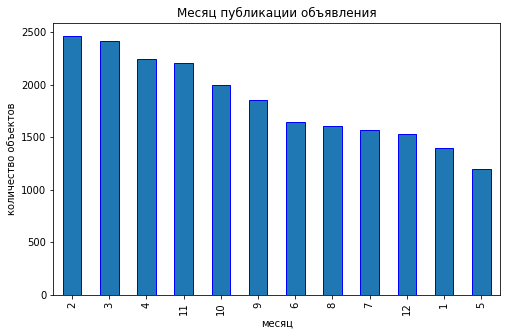

In [ ]:
# построим гистограмму

data['exposition_month'].value_counts().plot(kind = 'bar', figsize=(8,5), ec='blue')

plt.title('Месяц публикации объявления')
plt.xlabel('месяц')
plt.ylabel('количество объектов')
plt.show()

В данном случае самые активные месяцы для размещения объявлений - это февраль и март. Реже размещали объявления в январе и мае (самые насыщенные месяца по праздничным дням, население отдыхает).

**Вывод**

Изучив параметры объектов недвижимости, можем определить "портрет" продаваемой недвижимости в Санкт-Петербурге и соседних населенных пунктах:

* Недвижимость находится примерно в 25 км от аэропорта и в 12 км от центра города,

* Месторасположение удачное и в пешей доступность имеется парк на расстоянии 500 м,

* Квартира расположена в доме 5 или 10 этажей, с 1 по 4 этаж,

* Самый распространенный вариант по количеству 1-2 комнат,

* Общая площадь объекта недвижимости составляет 52м, с жилой зоной 20-30м и кухней 10м, высота потолков 2,6м,

* Стоимость таких объектов находится в диапазоне 5-10 млн в зависимости от количетсва комнат,

* Как правило объявления по таким квартирам размещают в феврале-марте в середине недели (вторник-среда).


#### Изучение скорости продажи объектов `days_exposition`

In [ ]:
# посмотрим общее представление по этому столбцу
display(data['days_exposition'].describe())

count    19125.000000
mean       180.151582
std        218.844912
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Напомним, в этом столбце изначально у нас были пропуски в данных - 13%. Это достаточно высокий показатель и скорее всего пропуски образовались за счет того, что продавец мог продать недвижимость и забыть закрыть объявление.

Мы видим, что среднее количество дней размещения равно 180 дням или 6 мес. При этом максимальное количество равно 1580 дней или 4 года, что явно указывает нам на то, что продавцы вовремя не закрывали сделки на сайте.

Медианное значение равно 95 дней или 3 мес - это более реалистичный показатель для сделок с недвижимостью.

Показатель std (стандартное отклонение) равен 218 и он выше, чем среднее значение, что говорит нам о том, что в выборке много аномальных значений.

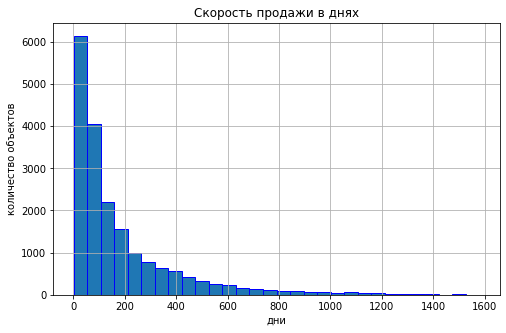

In [ ]:
# построим гистограмму

data['days_exposition'].hist(bins = 30, figsize=(8,5), ec='blue')
plt.title('Скорость продажи в днях')
plt.xlabel('дни')
plt.ylabel('количество объектов')
plt.show()

В итоге мы видим, что основная часть объявлений закрывается до 100 дней - это и есть оптимальный срок продажи.

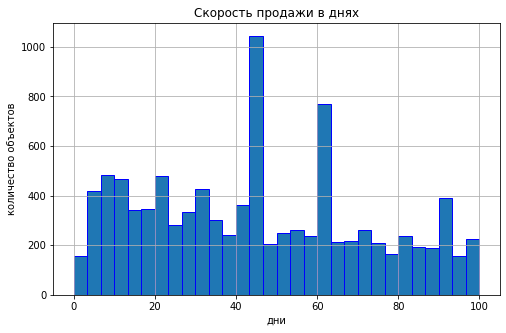

In [ ]:
# построим гистограмму, ограничив количество дней до 100

data['days_exposition'].hist(bins = 30, figsize=(8,5), ec='blue', range = (0,100))
plt.title('Скорость продажи в днях')
plt.xlabel('дни')
plt.ylabel('количество объектов')
plt.show()

При более детальном рассмотрении графика мы видим, что большинство квартир продается в срок 45 дней и 60 дней.

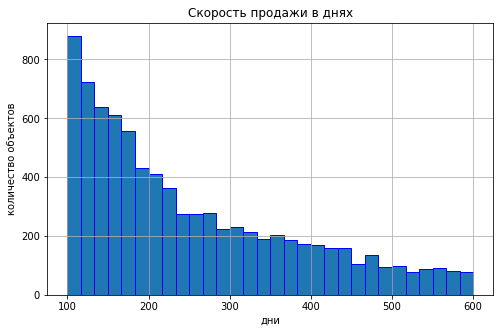

In [ ]:
# построим гистограмму, ограничив количество дней от  100 до 600

data['days_exposition'].hist(bins = 30, figsize=(8,5), ec='blue', range = (100,600))
plt.title('Скорость продажи в днях')
plt.xlabel('дни')
plt.ylabel('количество объектов')
plt.show()

In [ ]:
# посчитаем количество объявлений , которые были размещены на срок более 1 года
display(data.query('days_exposition > 365').count())

total_images            2836
last_price              2836
total_area              2836
first_day_exposition    2836
rooms                   2836
ceiling_height          2836
floors_total            2836
living_area             2733
floor                   2836
is_apartment            2836
studio                  2836
open_plan               2836
kitchen_area            2646
balcony                 2836
locality_name           2836
airports_nearest        2204
city_centers_nearest    2204
parks_around_3000       2836
parks_nearest           1085
ponds_around_3000       2836
ponds_nearest           1204
days_exposition         2836
price_metr              2836
exposition_day          2836
exposition_month        2836
exposition_year         2836
floor_category          2836
city_center_km          2204
last_price_10           2836
dtype: int64

In [ ]:
data.shape

(22106, 29)

Получается, что количество объявлений, которые активны более 1 года (365 дней), равно 2836 или 13% от осташегося массива данных. Это достаточно высокий показатель, поэтому такие объявления удалять не будем.  

Общий **вывод** по этому разделу можно сделать следующий: самыми быстрыми продажами можно считать объявления со сроком размещения до 40 дней, оптимальные продажи в срок 45-60 дней, долгими продажами можно считать объявления со сроком от 230 дней (выше 3 квартиля). Продажи в срок свыше 600 дней можно считать аномальными и неподходящими для принятия решений.

#### Факторы влияния на стоимость объекта

В данном разделе нам понадобятся отдельные показатели для оценки взаимосвязей:

o	общей площади;

o	жилой площади;

o	площади кухни;

o	количества комнат;

o	этажа, на котором расположена квартира (первый, последний, другой);

o	даты размещения (день недели, месяц, год).


In [ ]:
# выберем необходимые столбцы
columns_corr = [ 'last_price_10', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']

In [ ]:
# построим матрицу корреляции

data_matrix = data[columns_corr].corr()
display(data_matrix)

,last_price_10,total_area,living_area,kitchen_area,rooms,floor
last_price_10,1.000000,0.714227,0.595448,0.575314,0.413637,0.057261
total_area,0.714227,1.000000,0.920275,0.569437,0.782330,-0.018992
living_area,0.595448,0.920275,1.000000,0.331198,0.856206,-0.091289
kitchen_area,0.575314,0.569437,0.331198,1.000000,0.192649,0.137435
rooms,0.413637,0.782330,0.856206,0.192649,1.000000,-0.142582
floor,0.057261,-0.018992,-0.091289,0.137435,-0.142582,1.000000


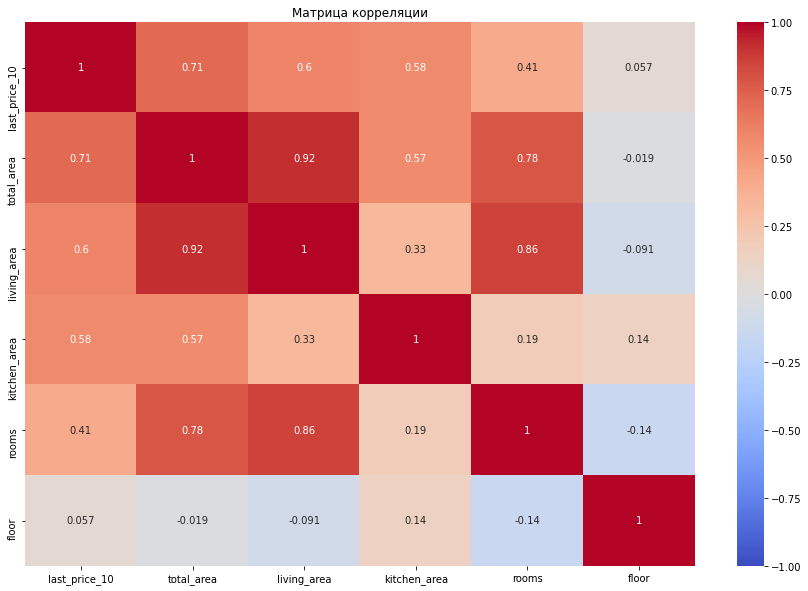

In [ ]:
# отразим матрицу корреляции графически

plt.figure(figsize = (15, 10))
sns.heatmap(data_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=columns_corr,
            xticklabels=columns_corr)
plt.title('Матрица корреляции')
plt.show()

Построим сводные таблицы с расчетом среднего значения по цене для определения зависимости стоимости объекта от даты / месяца / года публикации объявления.

In [ ]:
# Сводная таблица (день публикации объявления)

pivot_price_day = data.pivot_table(index = 'exposition_day', values = 'last_price_10')
display(pivot_price_day)


,last_price_10
exposition_day,
0,6.024673
1,5.985252
2,5.965983
3,6.208844
4,5.825906
5,5.892622
6,5.769175


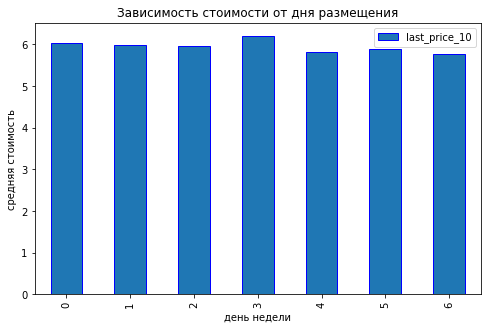

In [ ]:
# График

pivot_price_day.plot(kind = 'bar', xlabel='exposition_day', ylabel='last_price_10', figsize=(8,5), ec='blue')
plt.title('Зависимость стоимости от дня размещения')
plt.xlabel('день недели')
plt.ylabel('средняя стоимость')
plt.show()

На этом графике видим, что зависимости стоимости объекта от дня публикации объявления нет.

In [ ]:
# Сводная таблица (месяц публикации объявления)

pivot_price_month = data.pivot_table(index = 'exposition_month', values = 'last_price_10')
display(pivot_price_month)

,last_price_10
exposition_month,
1,6.013071
2,6.086390
3,5.820333
4,5.965677
5,5.981738
6,5.826257
7,5.968626
8,6.028054
9,6.087623


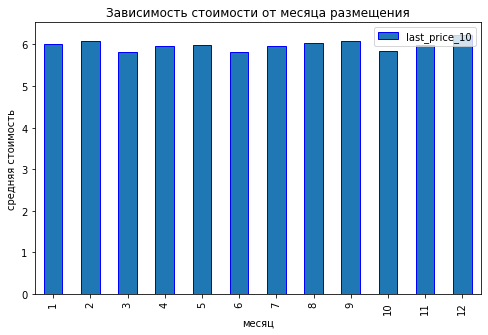

In [ ]:
# График

pivot_price_month.plot(kind = 'bar', xlabel='exposition_month', ylabel='last_price_10', figsize=(8,5), ec='blue')
plt.title('Зависимость стоимости от месяца размещения')
plt.xlabel('месяц')
plt.ylabel('средняя стоимость')
plt.show()

На этом графике видим, что зависимости стоимости объекта от месяца публикации объявления нет.

In [ ]:
# Сводная таблица (год публикации объявления)

pivot_price_year = data.pivot_table(index = 'exposition_year', values = 'last_price_10')
display(pivot_price_year)

,last_price_10
exposition_year,
2014,11.055966
2015,7.371573
2016,6.113606
2017,5.887515
2018,5.623363
2019,6.350577


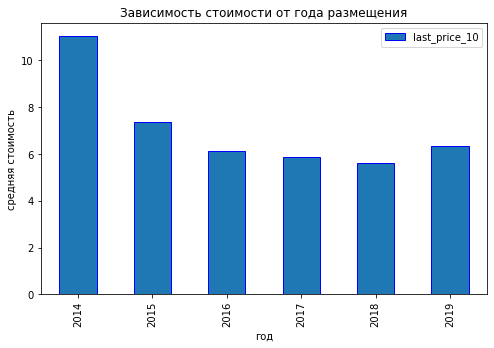

In [ ]:
# График

pivot_price_year.plot(kind = 'bar', xlabel='exposition_year', ylabel='last_price_10', figsize=(8,5), ec='blue')
plt.title('Зависимость стоимости от года размещения')
plt.xlabel('год')
plt.ylabel('средняя стоимость')
plt.show()

На этом графике видим, что в данном случае есть зависимость стоимости объекта от года публикации объявления. С 2014 года средняя стоимость объектов значительно снизилась на 36%. И с 2015 по 2018 год также снижалась не значительно (по 14-16%). В 2019 году мы видим небольшое восстановление цен на +13%.

Для отражения корреляционной зависимости между показателями построим диаграммы рассеивания

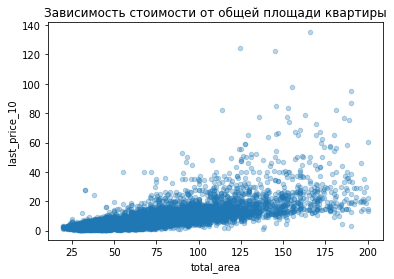

In [ ]:
# общая площадь

data.plot(x = 'total_area', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от общей площади квартиры')
plt.show()

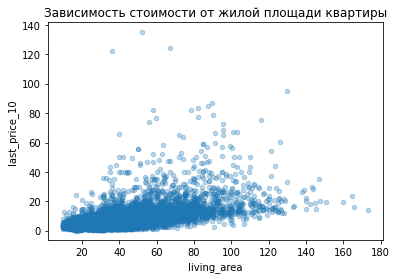

In [ ]:
# жилая площадь

data.plot(x = 'living_area', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от жилой площади квартиры')
plt.show()

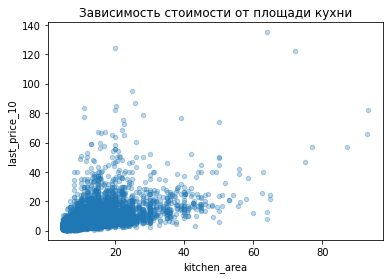

In [ ]:
# площадь кухни

data.plot(x = 'kitchen_area', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от площади кухни')
plt.show()

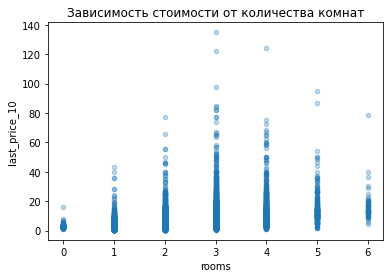

In [ ]:
# количество комнат

data.plot(x = 'rooms', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от количества комнат')
plt.show()

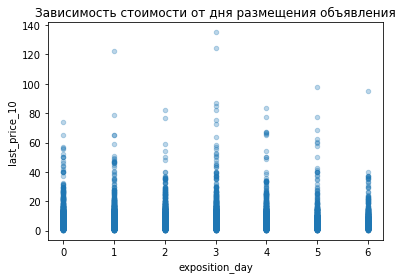

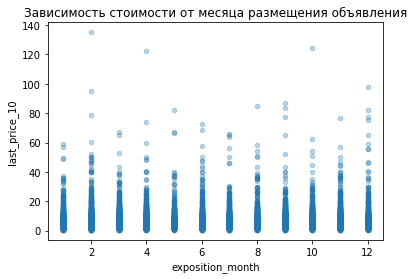

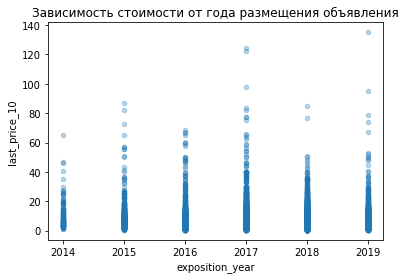

In [ ]:
# дата размещения (день недели, месяц, год)

data.plot(x = 'exposition_day', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от дня размещения объявления')
plt.show()

data.plot(x = 'exposition_month', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от месяца размещения объявления')
plt.show()

data.plot(x = 'exposition_year', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от года размещения объявления')
plt.show()

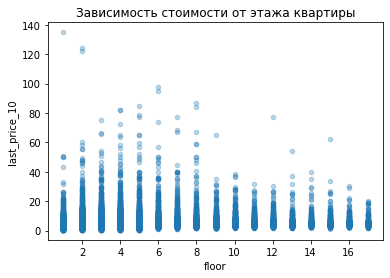

In [ ]:
# этаж квартиры

data.plot(x = 'floor', y = 'last_price_10', kind = 'scatter', alpha = 0.3)
plt.title('Зависимость стоимости от этажа квартиры')
plt.show()

Чтобы посмотреть связь между категориальными признаками по показателю Этаж, построим сводную
таблицу и рассчитаем показатели для нее.

,count,mean,median
floor_category,,,
другой,16161,6.285856,4.800
первый,2845,4.633333,3.900
последний,3100,5.610520,4.245


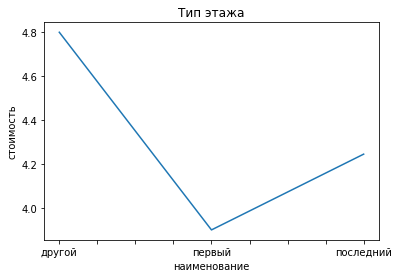

In [ ]:
# Сводная таблица

pivot_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price_10', aggfunc = ['count', 'mean', 'median'])

# Корректируем название
pivot_floor_category.columns = ['count', 'mean', 'median']
display(pivot_floor_category)

# График
pivot_floor_category['median'].plot(x = 'count',y = 'median')
plt.title('Тип этажа')
plt.xlabel('наименование')
plt.ylabel('стоимость')
plt.show()

У квартир отличных не первого и последнего этажа максимальное медианное значение по стоимости.

**Вывод**

На графике мы можем наблюдать положительную корреляцию между общей площадью квартиры и стоимостью, между жилой площадью и стоимостью, между площадью кухни и стоимостью. То есть чем выше площадь, тем выше стоимость недвижимости. Коэффициенты Пирсона > 0,5 и стремятся к 1.

Также небольшая положительная линейная связь есть между количеством комнат и стоимостью, то есть чем больше комнат, тем выше стоимость объекта. Коэффициент Пирсона 0,41

Связь отсутствует между стоимостью и этажом, на котором расположена квартира.

Присутствует связь между стоимостью объекта и годом публикации объявлений. Взаимосвязи даты / месяца публикации и ценой недвижимости нет.


#### Рейтинг 10 населенных пунктов

In [ ]:
# 10 населенных пунктов с наибольшим числом объявлений

locality_top = data['locality_name'].value_counts().head(10)
display(locality_top)


Санкт-Петербург    14666
посёлок Мурино       459
Кудрово              412
Всеволожск           396
посёлок Шушары       394
Пушкин               360
Колпино              335
Гатчина              302
Выборг               235
Петергоф             201
Name: locality_name, dtype: int64

Cформируем сводную таблицу, чтобы потом вывести значение за квадратный метр из списка 10 населенных пунктов с наибольшим числом объявлений

In [ ]:
locality_metr = data.query('locality_name in @locality_top.index')
#locality_metr['locality_name'].head(10)

locality_10 = locality_metr.pivot_table(index = 'locality_name', values = 'price_metr')

In [ ]:
display(locality_10.sort_values(by = 'price_metr', ascending=False))

,price_metr
locality_name,
Санкт-Петербург,112887.728829
Пушкин,103116.980556
Кудрово,95692.235437
посёлок Мурино,85551.753813
Петергоф,84757.532338
посёлок Шушары,78462.454315
Колпино,75370.214925
Гатчина,68846.387417
Всеволожск,68565.146465


**Вывод**

Итого мы получили выборку из топ-10 населенных пунктов с наибольшим числом объявлений. Среди этих локаций самый дорогой квадратный метр в Санкт-Петербурге - 112887, далее город Пушкин 103116, так как эти города являются историческими центрами ленинградской области.

Самая низкая стоимость среди топ-10 у Всеволожска - 68565 и у Выборга 58140, что вцелом объясняется небольшим количеством проживающего населения (до 10 тыс чел) и удаленностью от Санкт-Петербурга.

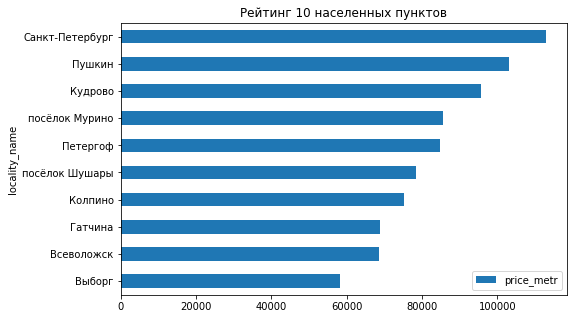

In [ ]:
locality_10.sort_values(by = 'price_metr').plot(kind = 'barh', xlabel = 'locality_name', ylabel = 'price_metr', figsize=(8,5))
plt.title('Рейтинг 10 населенных пунктов')
plt.show()

#### Зависимость стоимости объектов от расстояния до центра города в километрах

In [ ]:
data.shape

(22106, 29)

In [ ]:
# выделим объявления с недвижимостью только в Санкт-Петербурге

piter = data.query('locality_name == "Санкт-Петербург"')

In [ ]:
# построим сводную таблицу с расчетом средней стоимости за квадратный метр в пересчете за км

piter_pivot = piter.pivot_table(index = 'city_center_km', values = 'price_metr')
display(piter_pivot.head())

,price_metr
city_center_km,
0.0,231617.863636
1.0,147796.113772
2.0,147738.949640
3.0,120870.202417
4.0,127755.711388


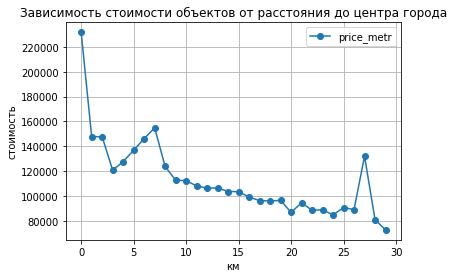

In [ ]:
# отразим графически полученные данные
piter_pivot.plot(grid=True, style='o-')
plt.title('Зависимость стоимости объектов от расстояния до центра города')
plt.xlabel('км')
plt.ylabel('стоимость')
plt.show()

**Вывод**

На графике видим, что максимальная стоимость у объектов, расположенных до 1 км от центра города.
Затем на расстоянии примерно от 3 до 8 км стоимость корректируется в сторону увеличения, возможно это связано с новой застройкой недвижимостью близлежащей территории города. И далее стоимость постепенно снижается с увеличением удаленности от центра города. На 27 км имеется резкий рост стоимости, возможно была единичная продажа какого-то дорогого дома.

В итоге мы видим корреляцию между стоимостью объекта недвижимости и удаленностью от центра: чем ближе к центру города, тем дороже недвижимость.

### Общий вывод

Общий вывод можно построить так:
Краткий обзор проведённой работы. Что выполнили, сделали, рассчитали.
Главные выводы. Дайте ответы на поставленные вопросы.
Рекомендации. Например, вы можете посоветовать отобрать определённые признаки для прогнозирования в будущем или дать рекомендации о том, как избежать появления дубликатов или пропущенных значений.

**В ходе исследования были применены следующие алгоритмы изучения и анализа данных:**

- получение общей информации о выгрузке данных
- переименование столбцов
- осуществлена работа с пропусками
- поиск и устранение дубликатов
- добавление новых расчетных столбцов с показателями
- изучение и исследование параметров объекта недвижимости
- поиск взаимосвязей между параметрами и стоимостью объекта недвижимости
- визуализация данных и параметров оценки недвижимости
- была произведена очистка данных от выбросов и аномальных значений, удалено около 7% от первоначального массива


**Получили ответы на поставленные вопросы и выявили закономерность по параметрам:**

- Наибольшее количество объявлений размещено в Санкт-Петербурге (14666) и средняя стоимость квадратного метра там равна 112887
- Наибольшее влияние на стоимость объекта недвижимости оказывает: удаленность к центру города, метраж квартиры / жилой зоны / кухни и количество комнат. Сезонности размещения объявлений не обнаружено.
- Получили / изучили параметры типичной недвижимости на продажу:  объект находится примерно в 25 км от аэропорта и в 12 км от центра города, месторасположение удачное и в пешей доступности имеется парк на расстоянии 500 м, расположена в доме 5 или 10 этажей, с 1 по 4 этаж, с 1-2 комнатами, общей площадью 52м, с жилой зоной 20-30м и кухней 10м, высота потолков 2,6м, стоимость в диапазоне 5-10 млн в зависимости от количетсва комнат
- Оптимальное количество дней для продажи составляет от 40 до 230 дней



**Рекомендации:**

- не допускать наличие такого большого количества пропусков значений в столбцах: если данные заполняются человеком на сайте, то установить дополнительные проверки по качеству заполнения данных (например, поле с количеством этажей сделать обязательным и подсвечивать его, если оно остается пустым)
- наименование столбцов приводить к унифицированным стандартам записи названий (например, без верхнего регистра)
- дубликаты: при заполнении данных на сайте человеком, сделать возможность выбирать из выпадающего списка наименования населенных пунктов
- даты: при расчете количества дней публикации объявления, сделать этот параметр автоматическим или по незакрытым объявлениям рассчитывать показатель на дату выгрузки массива данных
- еще раз проверить алгоритм заполнения и расчета картографических показателей во избежание пропусков данных
